TIME DEPENDENT $\Omega$ IN PROGRESS

In [2]:
from utilities import time_evolve
from construct_H_tree import construct_H_tree
from Species import Ca40
from structures import Laser, Chain
from Chamber import Chamber
import numpy as np
from math import sqrt

ion = Ca40([("S1/2", -1/2, "S"), ("D5/2", -1/2, "D")])

chain = Chain([ion], trap_freqs=[3e6, 3e6, 1e6], selected_modes=[])

mode = chain.modes[-1]
mode.modecutoff(4)

chain.selected_modes = [mode] # consider one mode

laser = Laser(phi=0, k_hat=np.array([1,0,1])/sqrt(2), eps_hat = np.array([1, 0, -1])/sqrt(2))
laser.detune(mode.eigenfreq)
laser.detune(mode.eigenfreq - 31e3)
chamber = Chamber(chain = chain, lasers = [laser], 
                B = 4e-4, Bhat = np.array([0,0,1]))

chamber.set_laser_wavelength_from_transition(0, ion.transition(("S", "D")))
chamber.set_laser_intensity_from_pi_time(0, 2e-6, ion.transition(("S", "D")))

timescale = 1e-6

H_tree = construct_H_tree(chamber, timescale)

H_tree.apply_ld_and_rwa_approximations(n_cutoff = mode.N, ld_cond_th = 1e-2, rwa_cutoff='inf')

Expanding to 2nd order in the Lamb-Dicke approximation


10.0%. Run time:   0.19s. Est. time left: 00:00:00:01
20.0%. Run time:   0.36s. Est. time left: 00:00:00:01
30.0%. Run time:   0.53s. Est. time left: 00:00:00:01
40.0%. Run time:   0.76s. Est. time left: 00:00:00:01
50.1%. Run time:   0.98s. Est. time left: 00:00:00:00
60.1%. Run time:   1.21s. Est. time left: 00:00:00:00
70.1%. Run time:   1.42s. Est. time left: 00:00:00:00
80.1%. Run time:   1.65s. Est. time left: 00:00:00:00
90.1%. Run time:   1.87s. Est. time left: 00:00:00:00
100.0%. Run time:   2.05s. Est. time left: 00:00:00:00
Total run time:   2.05s


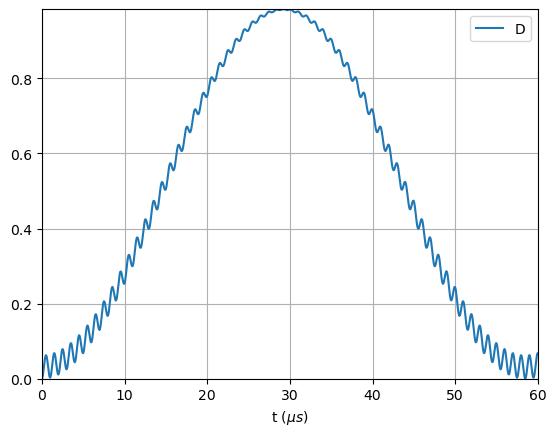

In [3]:
from qutip import tensor

duration = 60
times = np.linspace(0, duration,  1000)

psi_ion = ion.state["S"]
psi_mot = mode.setstate(0)

psi_0 = tensor(psi_ion, psi_mot)

op = chain.ion_projector(1, "D")

results = time_evolve(H_tree, psi_0, times, expt_ops=[op], progress_bar= True)
results.quick_plot()
